In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt
import copy
import warnings
from tqdm.notebook import tqdm
from matplotlib import cm
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_pickle("/Users/laurabraadrasmussen/Bachelorprojekt/df_equal.pkl")


In [4]:
images_arr = []
for im in tqdm(range(10)): 
    images_arr.append(np.array(df['Images'][im]))

images_output = []
for i in tqdm(images_arr):
    if len(i.shape) == 2:
        images_output.append(cv2.cvtColor(i, cv2.COLOR_GRAY2BGR))
    else:
        images_output.append(i)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
# Get the HoG face detection model.
hog_face_detector = dlib.get_frontal_face_detector()

hog_face_detector

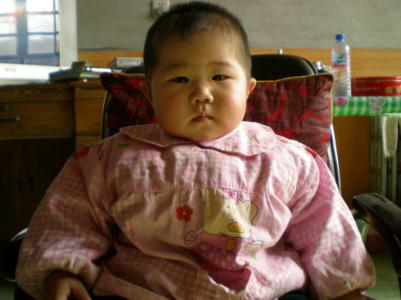

In [71]:
test = df['Images'][6440]#6440, 6449
#test = images_output[4]
test

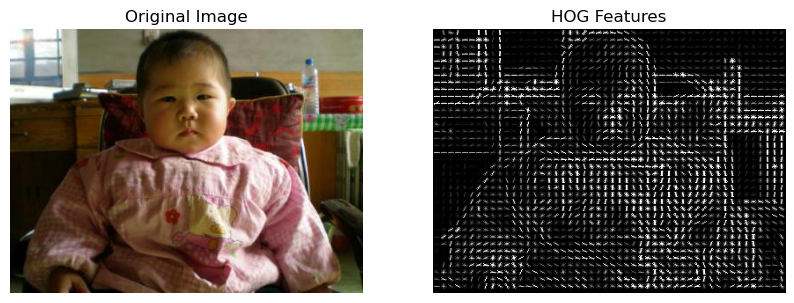

In [72]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage import io

# Load an example image
image = test

# Convert the image to grayscale
#image_gray = test[:,:,0]
#image_gray = io.imread(test, as_gray=True)
image_gray = test.convert('L')
# Compute the HOG features
hog_features, hog_image = hog(image_gray, visualize=True)

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG Features')
ax2.axis('off')
plt.show()

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import dlib

# Load the pre-trained face detection model
detector = dlib.get_frontal_face_detector()

# Load the image using OpenCV
image = images_output[1]

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Compute the HOG gradients
gradients = dlib.image_gradients(gray)

# Rescale the gradients for better visualization
gradients_rescaled = exposure.rescale_intensity(gradients, out_range=(0, 255))

# Create a heat map of the gradients
heatmap = np.mean(gradients_rescaled, axis=2)

# Display the heat map
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.show()

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. _dlib_pybind11.image_gradients(scale: int)
    2. _dlib_pybind11.image_gradients()

Invoked with: array([[33, 33, 33, ..., 90, 89, 89],
       [33, 33, 33, ..., 90, 89, 89],
       [33, 33, 33, ..., 90, 89, 89],
       ...,
       [14, 14, 14, ..., 10, 10, 10],
       [14, 14, 14, ...,  9, 10, 10],
       [14, 14, 14, ...,  9, 10, 10]], dtype=uint8)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier('/Users/laurabraadrasmussen/Bachelorprojekt/haarcascade_frontalface_default.xml')

# Load the image using OpenCV
image = images_output[1]

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Create an empty mask for the heat map
heatmap = np.zeros_like(gray, dtype=np.float32)

# Iterate over the detected faces and update the heat map
for (x, y, w, h) in faces:
    heatmap[y:y+h, x:x+w] += 1

# Normalize the heat map values
heatmap /= np.max(heatmap)

# Create a heat map visualization
heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))  # Resize heat map to match the image size
heatmap = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_JET)  # Apply color map

# Combine the heat map with the original image
output = cv2.addWeighted(image, 0.7, heatmap, 0.3, 0)

# Display the output image
cv2.imshow('Heat Map', output)
cv2.waitKey(0)
cv2.destroyAllWindows()